In [3]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib as mpl
import matplotlib.pyplot as plt
import math


In [4]:
nfs_path = "/nfs/dust/belle2/user/axelheim/thesisPlots_data/"
#NN_results.to_csv(nfs_path +  "NORMEDdistri_numFSPs_correctAssignment_NAHSA_Gmodes_perMode_fixedD0.csv")
NN_results = pd.read_csv(nfs_path +  "NORMEDdistri_numFSPs_correctAssignment_NAHSA_Gmodes_perMode_fixedD0.csv")

In [5]:
# original notebook
# https://naf-jhub.desy.de/user/axelheim/notebooks/private/baumbauen/notebooks/40.5_ah_createMM2plotFromNNpreds.ipynb
# AND
# git checkout eda30d2b24a0986f6e3a68ea07d8e75ae40658a6

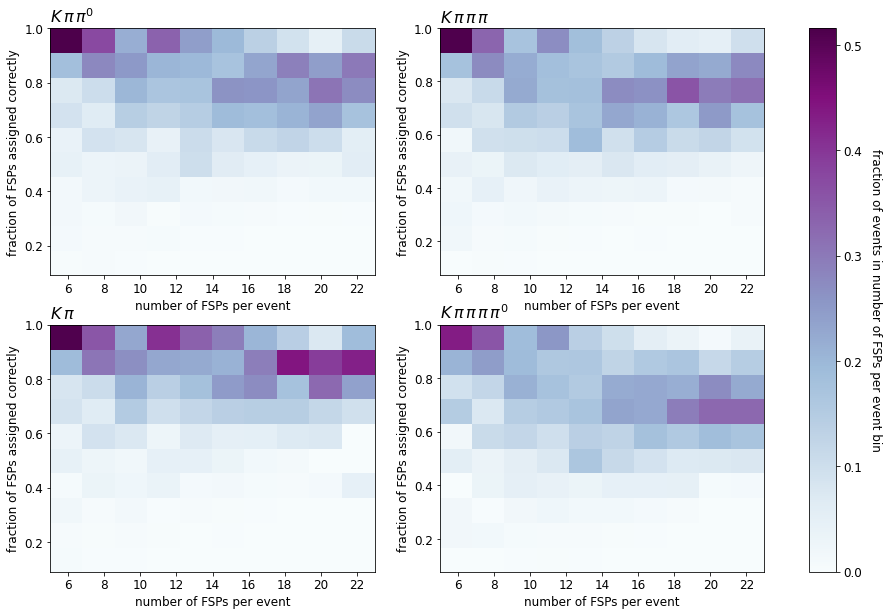

In [30]:
#bins = np.linspace(0, 30, 30)
fig, ax = plt.subplots(2,2)
#fig.suptitle(r'Number of FSPs vs. fraction of FSPs assigned correctly per event')
fig.set_size_inches(16, 10)

ax[0,0].set_xlabel(r'number of FSPs per event')
ax[0,0].set_ylabel("fraction of FSPs assigned correctly")

#h = ax.hist2d(NN_results["count"],NN_results["frac. correct FSPs"],#bins=bins,
#          norm=mpl.colors.LogNorm())


norm = 1
hist, xedges, yedges = np.histogram2d(NN_results["count"], NN_results["frac. correct FSPs"])#, bins=(binsX, binsY))
hist = hist.T
with np.errstate(divide='ignore', invalid='ignore'):  # suppress division by zero warnings
    hist *= norm / hist.sum(axis=0, keepdims=True)
    
vmin=0.0
vmax=hist.max()    


#print(hist)

DZERO_dict = {
  "Kpipi0"  : r'$K \, \pi \, \pi^0$',
  "Kpipipi"  : r'$K \, \pi  \, \pi  \, \pi$',
  "Kpi"  : r'$K \, \pi$',
  "Kpipipipi0"  : r'$K \, \pi \, \pi \, \pi \, \pi^0$', 
}


plotList = [["Kpipi0",(0,0)],["Kpipipi",(0,1)],["Kpi",(1,0)],["Kpipipipi0",(1,1)]]
for onePlot in plotList:
    hist, xedges, yedges = np.histogram2d(NN_results[NN_results["D0_decay"]==onePlot[0]]["count"], 
                                          NN_results[NN_results["D0_decay"]==onePlot[0]]["frac. correct FSPs"])#, bins=(binsX, binsY))
    hist = hist.T
    with np.errstate(divide='ignore', invalid='ignore'):  # suppress division by zero warnings
        hist *= norm / hist.sum(axis=0, keepdims=True)
    im = ax[onePlot[1]].pcolormesh(xedges, yedges, hist, cmap='BuPu',vmin=vmin, vmax=vmax)
    
    N=NN_results[NN_results["D0_decay"]==onePlot[0]].shape[0]
    ax[onePlot[1]].set_title(DZERO_dict[onePlot[0]],fontdict={'fontsize': 16}, loc='left')
    #ax[onePlot[1]].set_title(DZERO_dict[onePlot[0]] + " N=" + str(N),fontdict={'fontsize': 13})
    ax[onePlot[1]].set_xlabel(r'number of FSPs per event',fontdict={'fontsize': 12})
    ax[onePlot[1]].set_ylabel("fraction of FSPs assigned correctly",fontdict={'fontsize': 12})
    #fig.colorbar(im, ax=ax[onePlot[1]])
    
    ax[onePlot[1]].tick_params(axis='both', which='major', labelsize=12)
    ax[onePlot[1]].tick_params(axis='both', which='minor', labelsize=8)

    
#fig.colorbar(im, ax=ax)

cbar = fig.colorbar(im, ax=ax)
cbar.set_label('fraction of events in number of FSPs per event bin', rotation=270, size='large', labelpad=20)
cbar.ax.tick_params(labelsize=12) 


plt.savefig('plots/NORMEDdistri_numFSPs_correctAssignment_NAHSA_Gmodes_perMode_fixedD0.pdf')